In [26]:
import pandas as pd
#import pandas as pd
import numpy as np
#import seaborn as sns
from matplotlib import pyplot as plt
#import plotly.graph_objects as go
#from fbprophet import Prophet
#import pycountry

In [27]:
df = pd.read_csv('covid_19_india.csv')
df.drop(columns=['Sno','ConfirmedIndianNational','ConfirmedForeignNational','Time'],inplace=True)
#df_sort=df
#df_sort['Date']=pd.to_datetime(df['Date'].values)
#df_sort=df_sort.sort_values(["Date"])

In [28]:
df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,30/01/20,Kerala,0.0,0.0,1.0
1,31/01/20,Kerala,0.0,0.0,1.0
2,01/02/20,Kerala,0.0,0.0,2.0
3,02/02/20,Kerala,0.0,0.0,3.0
4,03/02/20,Kerala,0.0,0.0,3.0


In [56]:
#df['Date'] =pd.to_datetime(df.Date)
df=df.groupby(['State/UnionTerritory',"Date"]).head()
df=df.dropna()
States=np.unique(df['State/UnionTerritory'].values)
States=States[States!='Unassigned']
States

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Ladakh', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Mizoram', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Tamil Nadu', 'Telengana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

In [57]:
top5aff_states=df.groupby(['State/UnionTerritory']).max().sort_values(['Confirmed'],ascending=False)[:5].index.values

In [58]:
dates=df[df['State/UnionTerritory'] == 'Kerala']['Date'].values
refined_df_confirmed=pd.DataFrame(columns=dates,index=States)
refined_df_cured=pd.DataFrame(columns=dates,index=States)
refined_df_deaths=pd.DataFrame(columns=dates,index=States)

In [59]:

for state in States:
    df1=df[df['State/UnionTerritory'] == state]
    
    rec_date_idx=np.where(dates==df1['Date'].values[0])[0][0]
   # print(state)
    if rec_date_idx >0:
        df2=pd.DataFrame()
        df2['Date']=dates[:rec_date_idx]
        df2['Confirmed'] =  np.zeros(rec_date_idx)
        #df2['ConfirmedForeignNational'] = np.zeros(rec_date_idx)
        df2['Cured']=np.zeros(rec_date_idx)
        df2['Deaths']=np.zeros(rec_date_idx)
        df2['State/UnionTerritory']=state
        df2=df2.append(df1,ignore_index=True)
    else: 
        df2=df1
    refined_df_confirmed.loc[state]=df2['Confirmed'].values
    refined_df_cured.loc[state]=df2['Cured'].values

    refined_df_deaths.loc[state]=df2['Deaths'].values

    #df2.to_csv('refined_data_all_dates/'+state+'.csv',index=False)
refined_df_confirmed.index.name='State/UT'
refined_df_cured.index.name='State/UT'
refined_df_deaths.index.name='State/UT'

refined_df_cured.to_csv('refined_df_cured.csv')
refined_df_deaths
    
    
refined_df_confirmed.to_csv('refined_df_confirmed.csv')
refined_df_cured.to_csv('refined_df_cured.csv')
refined_df_deaths.to_csv('refined_df_deaths.csv')

/home/srashti/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


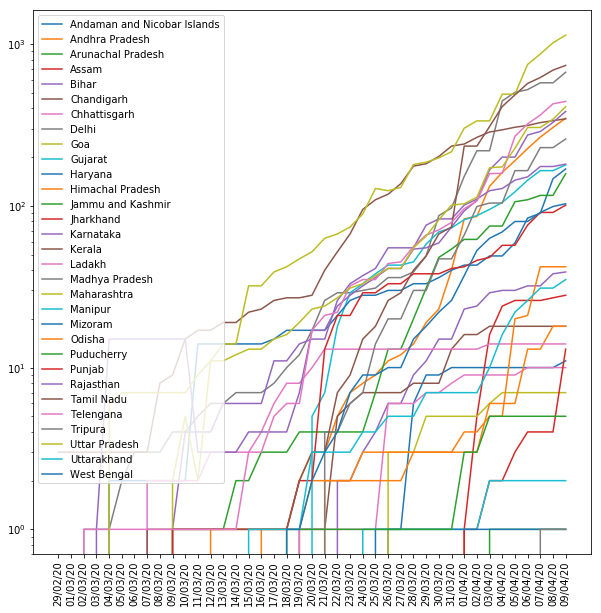

In [63]:
plt.figure(figsize=(10,10))

for state in States:
    df1=pd.read_csv('refined_data_all_dates/'+state+'.csv')
    df1=df1[30:]
    plt.plot(df1['Date'].values,df1['Confirmed'].values,"-",label=state)
    #np.savetxt(state+'.txt',df1['ConfirmedIndianNational']+df1['ConfirmedForeignNational'])
plt.xticks(rotation=90)
plt.legend()
plt.yscale('log')
plt.savefig('indian_states.png')
